In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import copy

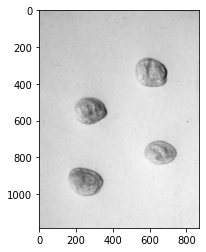

In [24]:
img = cv2.imread('convex.jpeg',0)

img=cv2.resize(img,(200,200))
plt.imshow(img,'gray')

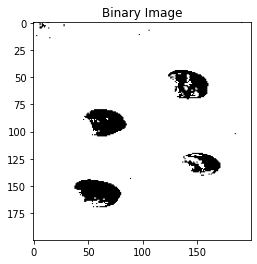

In [25]:
(thresh, blackAndWhiteImage) = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('Binary Image')
plt.imshow(blackAndWhiteImage,'gray')

In [26]:
struc_ele1=np.array([[0,999,999],[0,255,999],[0,999,999]])
struc_ele2=np.array([[0,0,0],[999,255,999],[999,999,999]])
struc_ele3=np.array([[999,999,0],[999,255,0],[999,999,0]])
struc_ele4=np.array([[999,999,999],[999,255,999],[0,0,0]])
ele=[struc_ele1,struc_ele2,struc_ele3,struc_ele4]

In [23]:
result=[]

padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        padded_arr[i+1][j+1] = blackAndWhiteImage[i][j]

for e in range(len(ele)):
    temp=padded_arr.copy()
    X=blackAndWhiteImage.copy()
    Xk=blackAndWhiteImage.copy()
    while(True):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                index1=0
                c=True
                for k in range(i,i+3):
                    index2=0
                    for l in range(j,j+3):
                        if(temp[k][l]!=ele[e][index1][index2] and ele[e][index1][index2] != 999):
                            c=False
                        index2+=1
                    index1+=1
                if(c):
                    Xk[i][j]=0
                else:
                    Xk[i][j]=255

        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                Xk[i][j]= Xk[i][j] and blackAndWhiteImage[i][j]

        if (np.alltrue(np.equal(X,Xk)) == True):
            break
        for i in range (img.shape[0]):
            for j in range(img.shape[1]):
                temp[i+1][j+1] = Xk[i][j]

        X=Xk.copy()

    result.append(X)

IndexError: index 200 is out of bounds for axis 0 with size 200

In [9]:
new_img=np.zeros(img.shape,'uint8')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp=255
        for k in range(len(result)):
            temp = temp and result[k][i][j]

        new_img[i][j]=temp

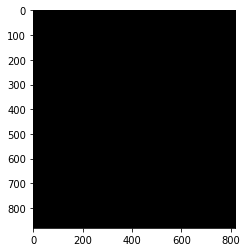

In [10]:
plt.imshow(new_img,'gray')